## Экогенетическая модель 1

- Стоит задача решения следующей жесткой системы дифференциальных уравнений, описывающей изменения численности популяций двух видов и эволюцию некого генетического признака $\alpha$.
- Система ОДУ имеет вид:

\begin{equation*}
    \begin{cases}
        \dot{x} = x(1 - 0.5x - \frac{2}{7\alpha^2}y)\\
        \dot{y} = y(2\alpha - 3.5\alpha^2x - 0.5y)\\
        \dot{\alpha} = \varepsilon(2 - 7\alpha x)
    \end{cases}
\end{equation*}

- Параметры задачи таковы: 
$$
\varepsilon \leqslant 0.01,~~~ 0 \leqslant x_0 \leqslant 3,~~~ 0 \leqslant y_0 \leqslant 15,~~~ \alpha_0 = 0,~~~ T_k = 1500  
$$

- Будем численно решать данную задачу с помощью **явного метода Рунге-Кутты 1-го порядка точности.**
- Следовательно, получаем следующую итерационную схему с матрицей Бутчера:

| 0 | 0 |
|---|---|
|   | 1 |

\begin{equation*}
    \vec{k_1^{(n)}} =
    \begin{bmatrix}
        k_{1x}^{(n)} \\ 
        k_{1xy}^{(n)} \\ 
        k_{1\alpha}^{(n)} \\ 
    \end{bmatrix}
    =
    \begin{bmatrix}
        x_n(1 - 0.5x_n - \frac{2}{7\alpha_n^2}y_n) \\ 
        y_n(2\alpha_n - 3.5\alpha_n^2x_n - 0.5y_n) \\ 
        \varepsilon (2 - 7\alpha_nx_n) \\ 
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \vec{u_{n + 1}} =
    \begin{bmatrix}
        x_{n + 1} \\ 
        y_{n + 1} \\ 
        \alpha_{n + 1} \\ 
    \end{bmatrix}
    = \vec{u_n} + \tau (\gamma_1 * \vec{k_1^{(n)}})
\end{equation*}

- **Проверим также на сетке устойчивость данного метода,** варьируя параметры задачи.

In [1]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

class Ecogenetic_model_1:
    def __init__(self, eps=random.uniform(1e-3, 1e-2), x0=random.randint(0, 3), y0=random.randint(0, 15), 
                 alpha0 = random.uniform(0.15, 3.65), Tk=1500, tau=1e-5):
        self.x = [x0]
        self.y = [y0]
        self.eps = eps
        self.alpha = [alpha0]
        self.Tk = Tk
        self.tau = tau
        self.Time = []
        print('eps = ', eps)
        print('alpha_0 = ', alpha0)
        print('x_0 = ', x0)
        print('y_0 = ', y0)
        
    def Explicit_Runge_Kutta_method_1_order(self):
        NumOfIter = int(self.Tk / self.tau)
        for i in tqdm(range(NumOfIter)):
            k1_x = self.x[i] * (1 - 0.5 * self.x[i] - (2 / (7 * (self.alpha[i] ** 2))) * self.y[i])
            k1_y = self.y[i] * (2 * self.alpha[i] - 3.5 * (self.alpha[i] ** 2) * self.x[i] - 0.5 * self.y[i])
            k1_alpha = self.eps * (2 - 7 * self.alpha[i] * self.x[i])
            
            self.x.append(self.x[i] + self.tau * k1_x)
            self.y.append(self.y[i] + self.tau * k1_y)
            self.alpha.append(self.alpha[i] + self.tau * k1_alpha)
            self.Time.append(self.tau * i)
        self.Time.append(self.Tk)
        print("x[0:5] = ", self.x[:5])
        print("y[0:5] = ", self.y[:5])
        print("alpha[0:5] = ", self.alpha[:5])
        
    def Plotting(self, points_cnt = 20000):
        
        indices = np.arange(0, len(self.Time), int(len(self.Time) / (points_cnt + 1)))
        TimeSample = np.take(self.Time, indices)
        xSample = np.take(self.x, indices)
        ySample = np.take(self.y, indices)
        alphaSample = np.take(self.alpha, indices)
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, xSample, label='x(t)')
        plt.title(r'Dependence of x on time')
        plt.xlabel('Time')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 5))
        plt.plot(TimeSample, ySample, label='y(t)')
        plt.title(r'Dependence of y on time')
        plt.xlabel('Time')
        plt.ylabel('y(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, alphaSample, label=r'$\alpha$(t)')
        plt.title(r'Dependence of $\alpha$ on time')
        plt.xlabel('Time')
        plt.ylabel(r'$\alpha$(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(ySample, xSample)
        plt.title('Dependence of x on y')
        plt.xlabel('y')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.show()

## Тесты

  1%|          | 43586/7500000 [00:00<00:17, 435859.38it/s]

eps =  0.007472581849582291
alpha_0 =  0.38923920752129126
x_0 =  1
y_0 =  9


100%|██████████| 7500000/7500000 [00:14<00:00, 500334.14it/s]


x[0:5] =  [1, 0.9983527676315584, 0.9967090465908546, 0.9950688275473991, 0.9934321012007591]
y[0:5] =  [9, 8.996173383017423, 8.99235090043428, 8.988532544822146, 8.984718308771559]
alpha[0:5] =  [0.38923920752129126, 0.3892386660023751, 0.3892381278401101, 0.3892375930273202, 0.3892370615568486]


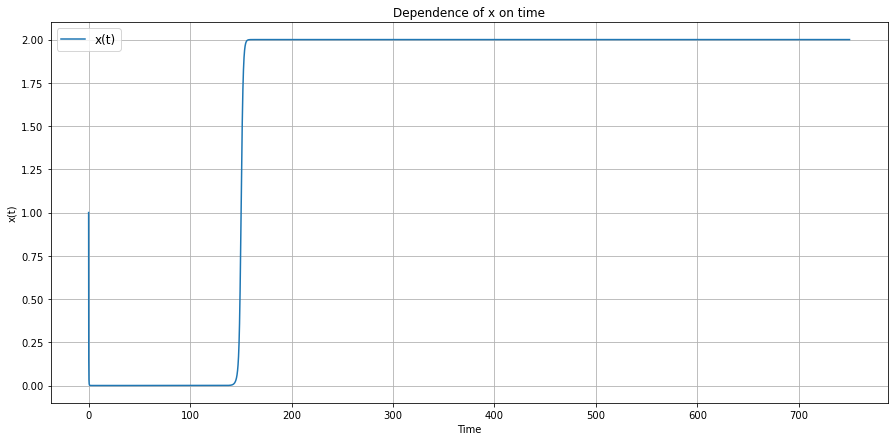

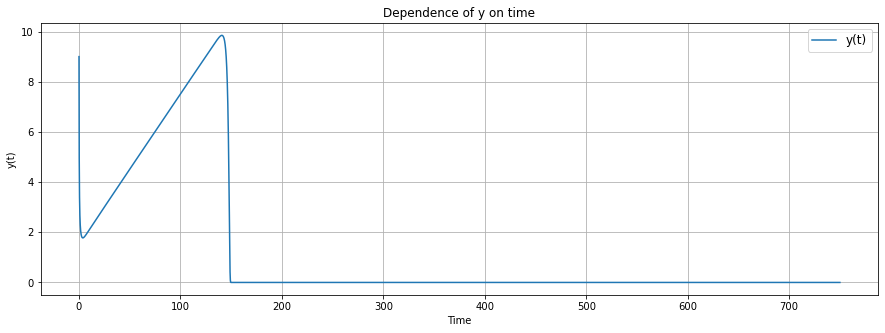

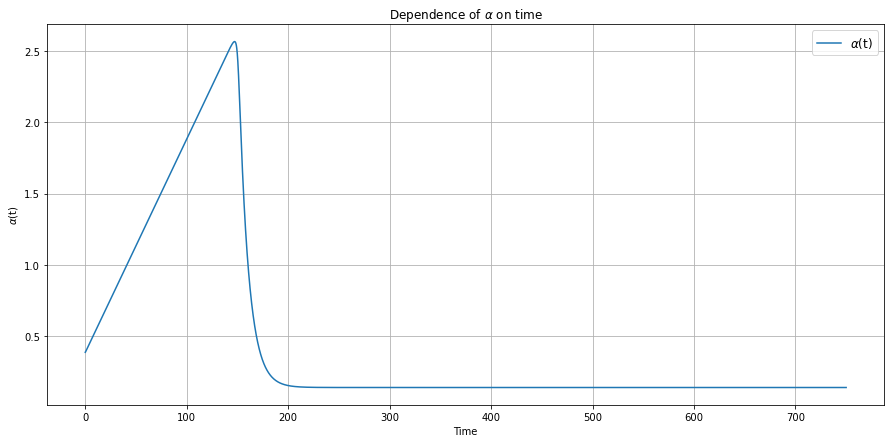

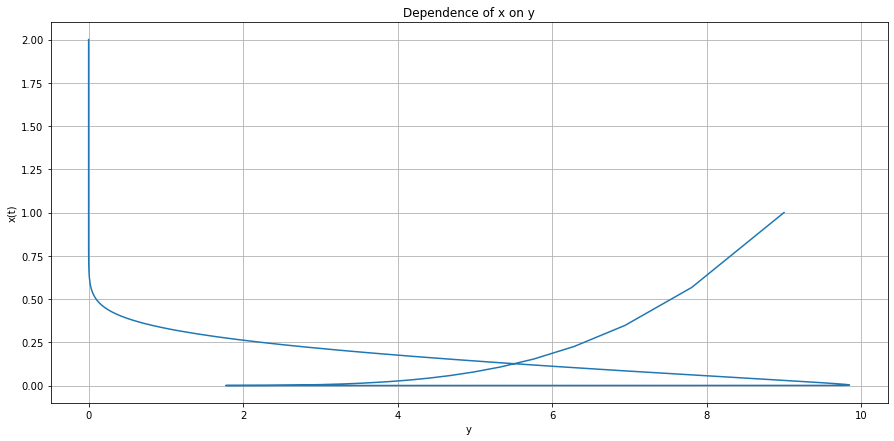

In [2]:
Test_1_1 = Ecogenetic_model_1(eps=random.uniform(1e-6, 1e-2), x0=random.randint(1, 3), y0=random.randint(1, 15), 
                            Tk=750, tau=1e-4, alpha0 = random.uniform(0.15, 3.65))
Test_1_1.Explicit_Runge_Kutta_method_1_order()
Test_1_1.Plotting()

  0%|          | 33217/7500000 [00:00<00:22, 332169.52it/s]

eps =  0.01
alpha_0 =  3.4
x_0 =  3
y_0 =  7.5


100%|██████████| 7500000/7500000 [00:13<00:00, 536512.92it/s]


x[0:5] =  [3, 2.999794389520514, 2.9995894797228124, 2.9993852623116237, 2.9991817291011067]
y[0:5] =  [7.5, 7.4112525, 7.323597770331854, 7.237021450256829, 7.151509387974159]
alpha[0:5] =  [3.4, 3.3999306, 3.3998612063508293, 3.39979181903548, 3.3997224380371414]


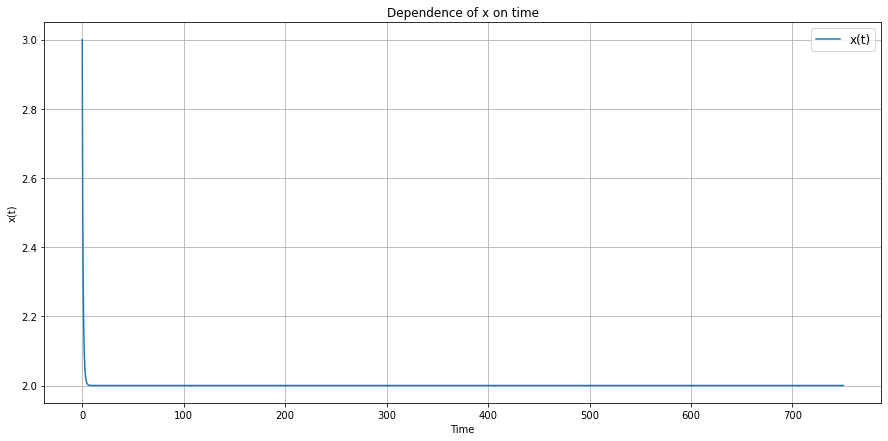

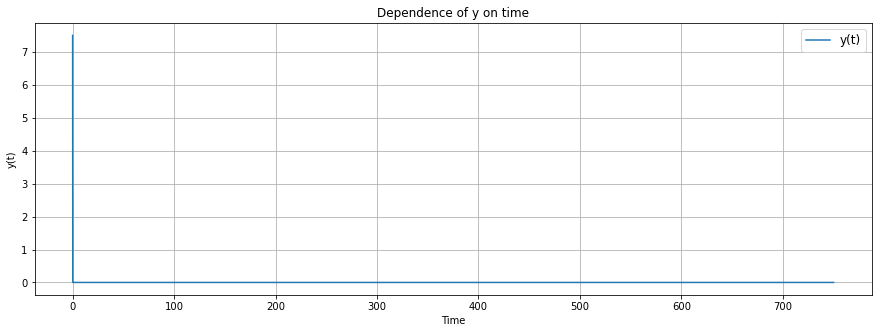

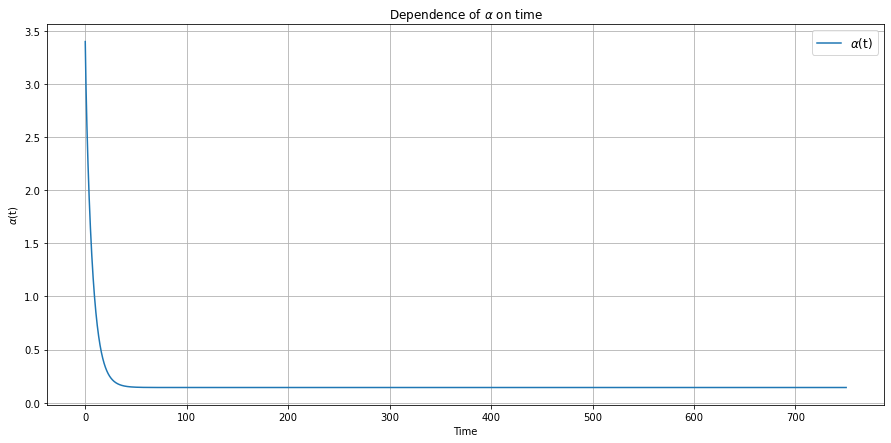

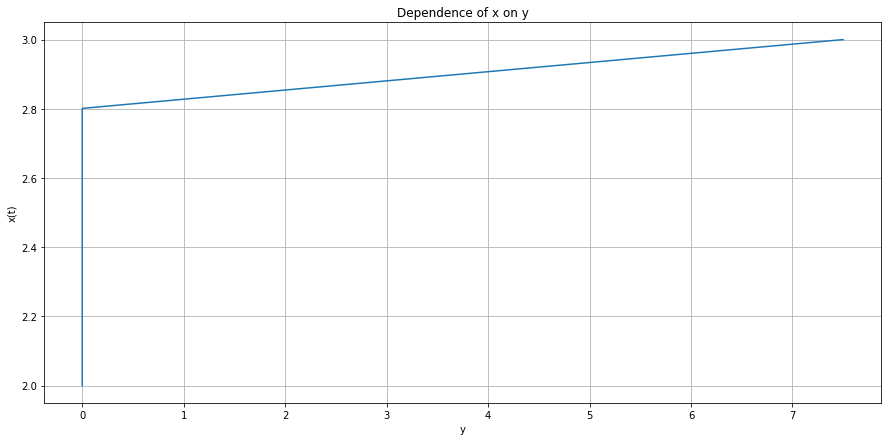

In [3]:
Test_1_2 = Ecogenetic_model_1(eps=1e-2, x0=3, y0=7.5, Tk=750, tau=1e-4, alpha0 = 3.4)
Test_1_2.Explicit_Runge_Kutta_method_1_order()
Test_1_2.Plotting(points_cnt = 5000)

In [4]:
Test_1_3 = Ecogenetic_model_1(eps=random.uniform(1e-6, 1e-2), x0=random.randint(1, 3), y0=random.randint(1, 15), 
                            Tk=1500, tau=0.1, alpha0 = random.uniform(0.15, 3.65))
Test_1_3.Explicit_Runge_Kutta_method_1_order()
Test_1_3.Plotting(points_cnt = 5000)

  0%|          | 12/15000 [00:00<00:00, 50840.05it/s]

eps =  0.00731356424567694
alpha_0 =  3.3448722013406105
x_0 =  1
y_0 =  7


OverflowError: (34, 'Result too large')

In [5]:
Test_1_4 = Ecogenetic_model_1(eps=random.uniform(1e-6, 1e-2), x0=random.randint(1, 3), y0=random.randint(1, 15), 
                            Tk=500, tau=1, alpha0 = random.uniform(0.15, 3.65))
Test_1_4.Explicit_Runge_Kutta_method_1_order()
Test_1_4.Plotting(points_cnt = 5000)

  2%|▏         | 8/500 [00:00<00:00, 31126.56it/s]

eps =  0.0007615648027468263
alpha_0 =  0.18476762365740193
x_0 =  2
y_0 =  4


OverflowError: (34, 'Result too large')

### Выводы:
- Нетрудно заметить, что при качественном изменении начальных параметров модели сильно меняется ее дальнейшее поведение. 
- Также видим, что если значение шага по сетке больше некоторого значения, то метод расходится. 

# Экогенетическая модель 2(1)

- Рассмотрим более интересный случай - численность двух популяций зависит от взаимодействия между ними и двух медленно изменяющихся генетических признаков:

\begin{equation*}
    \begin{cases}
        \dot{x} = x(2\alpha_1 - 0.5x - \frac{\alpha_1^2}{\alpha_2^2}y)\\
        \dot{y} = y(2\alpha_2 - \frac{\alpha_2^2}{\alpha_1^2}x - 0.5y)\\
        \dot{\alpha_1} = \varepsilon(2 - \frac{2\alpha_1}{\alpha_2^2}y)\\
        \dot{\alpha_2} = \varepsilon(2 - \frac{2\alpha_2}{\alpha_1^2}x)
    \end{cases}
\end{equation*}

- Обозначим

\begin{equation*}
    \vec{f}(t, \vec{u}) = 
    \begin{bmatrix}
        x(2\alpha_1 - 0.5x - \frac{\alpha_1^2}{\alpha_2^2}y)\\
        y(2\alpha_2 - \frac{\alpha_2^2}{\alpha_1^2}x - 0.5y)\\
        \varepsilon(2 - \frac{2\alpha_1}{\alpha_2^2}y)\\
        \varepsilon(2 - \frac{2\alpha_2}{\alpha_1^2}x)
    \end{bmatrix}
\end{equation*}



- Параметры задачи таковы: 
$$
\varepsilon \leqslant 0.01,~~~ 0 \leqslant x_0 \leqslant 40,~~~ 0 \leqslant y_0 \leqslant 40,~~~ \alpha_{10} = 0,~~~ \alpha_{20} = 10~~~ T_k = 2000  
$$

- Будем численно решать данную задачу с помощью **явного метода Рунге-Кутты 4-го порядка точности.**
- Следовательно, получаем следующую итерационную схему с матрицей Бутчера:

| 0   |     |     |     |     |
|-----|-----|-----|-----|-----|
| 1/2 | 1/2 |     |     |     |
| 1/2 | 0   | 1/2 |     |     |
| 1   | 0   | 0   | 1   |     |
|     | 1/6 | 2/6 | 2/6 | 1/6 |

\begin{equation*}
    \vec{k_1^{(n)}} =
    \begin{bmatrix}
        k_{1x}^{(n)} \\ 
        k_{1y}^{(n)} \\ 
        k_{1\alpha_1}^{(n)} \\ 
        k_{1\alpha_2}^{(n)} \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        x_n(2\alpha_{1n} - 0.5x_n - \frac{\alpha_{1n}^2}{\alpha_{2n}^2}y_n) \\ 
        y_n(2\alpha_{2n} - \frac{\alpha_{2n}^2}{\alpha_{1n}^2}x_n - 0.5y_n) \\ 
        \varepsilon(2 - \frac{2\alpha_{1n}}{\alpha_{2n}^2}y_n) \\
        \varepsilon(2 - \frac{2\alpha_{2n}}{\alpha_{1n}^2}x_n)
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \vec{k_2^{(n)}} =
    \begin{bmatrix}
        k_{2x}^{(n)} \\ 
        k_{2y}^{(n)} \\ 
        k_{2\alpha_1}^{(n)} \\ 
        k_{2\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \frac{\tau}{2}, \vec{u_n} + \frac{\tau}{2}\vec{k_1^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{k_3^{(n)}} =
    \begin{bmatrix}
        k_{3x}^{(n)} \\ 
        k_{3y}^{(n)} \\ 
        k_{3\alpha_1}^{(n)} \\ 
        k_{3\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \frac{\tau}{2}, \vec{u_n} + \frac{\tau}{2}\vec{k_2^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{k_4^{(n)}} =
    \begin{bmatrix}
        k_{4x}^{(n)} \\ 
        k_{4y}^{(n)} \\ 
        k_{4\alpha_1}^{(n)} \\ 
        k_{4\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \tau, \vec{u_n} + \tau\vec{k_3^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{u_{n + 1}} =
    \begin{bmatrix}
        x_{n + 1} \\ 
        y_{n + 1} \\ 
        \alpha_{1(n + 1)} \\
        \alpha_{2(n + 1)} \\
    \end{bmatrix}
    = \vec{u_n} + \frac{\tau}{6} (\vec{k_1^{(n)}} + 2\vec{k_2^{(n)}} + 2\vec{k_3^{(n)}} + \vec{k_4^{(n)}})
\end{equation*}

In [6]:
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

class Ecogenetic_model_2_Var1:
    def __init__(self, eps=random.uniform(1e-3, 1e-2), x0=random.randint(0, 40), y0=random.randint(0, 40), 
                 alpha10 = random.uniform(0.1, 5.0), alpha20 = 10, Tk=1500, tau=1e-5):
        self.x = [x0]
        self.y = [y0]
        self.eps = eps
        self.alpha1 = [alpha10]
        self.alpha2 = [alpha20]
        self.Tk = Tk
        self.tau = tau
        self.Time = []
        
        print('eps = ', eps)
        print('alpha_10 = ', alpha10)
        print('alpha_20 = ', alpha20)
        print('x_0 = ', x0)
        print('y_0 = ', y0)
        
    def Explicit_Runge_Kutta_method_4_order(self):
        NumOfIter = int(self.Tk / self.tau)
        
        for i in tqdm(range(NumOfIter)):
            k1_x = self.x[i] * (2 * self.alpha1[i] - 0.5 * self.x[i] -\
                                ((self.alpha1[i] / self.alpha2[i]) ** 2) * self.y[i])
            k1_y = self.y[i] * (2 * self.alpha2[i] - 0.5 * self.y[i] -\
                                ((self.alpha2[i] / self.alpha1[i]) ** 2) * self.x[i])
            k1_alpha1 = self.eps * (2 - ((2 * self.alpha1[i]) / (self.alpha2[i] ** 2)) * self.y[i])
            k1_alpha2 = self.eps * (2 - ((2 * self.alpha2[i]) / (self.alpha1[i] ** 2)) * self.x[i])
            
            k2_x = (self.x[i] + (self.tau / 2) * k1_x) * (2 * (self.alpha1[i] + (self.tau / 2) * k1_alpha1) -\
                    0.5 * (self.x[i] + (self.tau / 2) * k1_x) -\
                    (((self.alpha1[i] + (self.tau / 2) * k1_alpha1) /\
                    (self.alpha2[i] + (self.tau / 2) * k1_alpha2)) ** 2) *\
                    (self.y[i] + (self.tau / 2) * k1_y))
            k2_y = (self.y[i] + (self.tau / 2) * k1_y) * (2 * (self.alpha2[i] + (self.tau / 2) *\
                    k1_alpha2) - 0.5 * (self.y[i] + (self.tau / 2) * k1_y) -\
                    (((self.alpha2[i] + (self.tau / 2) * k1_alpha2) /\
                    (self.alpha1[i] + (self.tau / 2) * k1_alpha1)) ** 2) * (self.x[i] + (self.tau / 2) * k1_x))
            k2_alpha1 = self.eps * (2 - ((2 * (self.alpha1[i] + (self.tau / 2) * k1_alpha1)) /\
                        ((self.alpha2[i] + (self.tau / 2) * k1_alpha2) ** 2)) *\
                        (self.y[i] + (self.tau / 2) * k1_y))
            k2_alpha2 = self.eps * (2 - ((2 * (self.alpha2[i] + (self.tau / 2) * k1_alpha2)) /\
                        ((self.alpha1[i] + (self.tau / 2) * k1_alpha1) ** 2)) * (self.x[i] +\
                                                                                 (self.tau / 2) * k1_x))
            
            k3_x = (self.x[i] + (self.tau / 2) * k2_x) * (2 * (self.alpha1[i] + (self.tau / 2) * k2_alpha1) -\
                    0.5 * (self.x[i] + (self.tau / 2) * k2_x) -\
                    (((self.alpha1[i] + (self.tau / 2) * k2_alpha1) /\
                    (self.alpha2[i] + (self.tau / 2) * k2_alpha2)) ** 2) *\
                    (self.y[i] + (self.tau / 2) * k2_y))
            k3_y = (self.y[i] + (self.tau / 2) * k2_y) * (2 * (self.alpha2[i] + (self.tau / 2) *\
                    k2_alpha2) - 0.5 * (self.y[i] + (self.tau / 2) * k2_y) -\
                    (((self.alpha2[i] + (self.tau / 2) * k2_alpha2) /\
                    (self.alpha1[i] + (self.tau / 2) * k2_alpha1)) ** 2) * (self.x[i] + (self.tau / 2) * k2_x))
            k3_alpha1 = self.eps * (2 - ((2 * (self.alpha1[i] + (self.tau / 2) * k2_alpha1)) /\
                        ((self.alpha2[i] + (self.tau / 2) * k2_alpha2) ** 2)) *\
                        (self.y[i] + (self.tau / 2) * k2_y))
            k3_alpha2 = self.eps * (2 - ((2 * (self.alpha2[i] + (self.tau / 2) * k2_alpha2)) /\
                        ((self.alpha1[i] + (self.tau / 2) * k2_alpha1) ** 2)) * (self.x[i] +\
                                                                                 (self.tau / 2) * k2_x))
            
            k4_x = (self.x[i] + self.tau * k3_x) * (2 * (self.alpha1[i] + self.tau * k3_alpha1) -\
                    0.5 * (self.x[i] + self.tau * k3_x) - (((self.alpha1[i] + self.tau * k3_alpha1) /\
                    (self.alpha2[i] + self.tau * k3_alpha2)) ** 2) * (self.y[i] + self.tau * k3_y))
            k4_y = (self.y[i] + self.tau * k3_y) * (2 * (self.alpha2[i] + self.tau * k3_alpha2) -\
                    0.5 * (self.y[i] + self.tau * k3_y) -(((self.alpha2[i] + self.tau * k3_alpha2) /\
                    (self.alpha1[i] + self.tau * k3_alpha1)) ** 2) * (self.x[i] + self.tau * k3_x))
            k4_alpha1 = self.eps * (2 - ((2 * (self.alpha1[i] + self.tau * k3_alpha1)) /\
                        ((self.alpha2[i] + self.tau * k3_alpha2) ** 2)) * (self.y[i] + self.tau * k3_y))
            k4_alpha2 = self.eps * (2 - ((2 * (self.alpha2[i] + self.tau * k3_alpha2)) /\
                        ((self.alpha1[i] + self.tau * k3_alpha1) ** 2)) * (self.x[i] + self.tau * k3_x))
            
            self.x.append(self.x[i] + (self.tau / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x))
            self.y.append(self.y[i] + (self.tau / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y))
            self.alpha1.append(self.alpha1[i] + (self.tau / 6) * (k1_alpha1 + 2 * k2_alpha1 +\
                                                                  2 * k3_alpha1 + k4_alpha1))
            self.alpha2.append(self.alpha2[i] + (self.tau / 6) * (k1_alpha2 + 2 * k2_alpha2 +\
                                                                  2 * k3_alpha2 + k4_alpha2))
            self.Time.append(self.tau * i)
            
        self.Time.append(self.Tk)
        
        print("x[0:5] = ", self.x[:5])
        print("y[0:5] = ", self.y[:5])
        print("alpha1[0:5] = ", self.alpha1[:5])
        print("alpha2[0:5] = ", self.alpha2[:5])
        
    def Plotting(self, points_cnt = 20000):
        
        indices = np.arange(0, len(self.Time), int(len(self.Time) / (points_cnt + 1)))
        TimeSample = np.take(self.Time, indices)
        xSample = np.take(self.x, indices)
        ySample = np.take(self.y, indices)
        alpha1Sample = np.take(self.alpha1, indices)
        alpha2Sample = np.take(self.alpha2, indices)
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, xSample, label='x(t)')
        plt.title(r'Dependence of x on time')
        plt.xlabel('Time')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 5))
        plt.plot(TimeSample, ySample, label='y(t)')
        plt.title(r'Dependence of y on time')
        plt.xlabel('Time')
        plt.ylabel('y(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, alpha1Sample, label=r'$\alpha_1$(t)')
        plt.title(r'Dependence of $\alpha_1$ on time')
        plt.xlabel('Time')
        plt.ylabel(r'$\alpha_1$(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, alpha2Sample, label=r'$\alpha_2$(t)')
        plt.title(r'Dependence of $\alpha_2$ on time')
        plt.xlabel('Time')
        plt.ylabel(r'$\alpha_2$(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(ySample, xSample)
        plt.title('Dependence of x on y')
        plt.xlabel('y')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.show()

## Тесты

  0%|          | 7573/7500000 [00:00<01:38, 75723.21it/s]

eps =  0.003833281132754365
alpha_10 =  3.412789995779977
alpha_20 =  10
x_0 =  10
y_0 =  29


100%|██████████| 7500000/7500000 [01:48<00:00, 68989.59it/s]


x[0:5] =  [10, 9.998461940313335, 9.996951749092, 9.995469142946815, 9.994013842185302]
y[0:5] =  [29, 28.768081806494603, 28.53838524013231, 28.310882880725156, 28.085547746899092]
alpha1[0:5] =  [3.412789995779977, 3.4127900067079913, 3.4127900236740025, 3.4127900466202563, 3.412790075489709]
alpha2[0:5] =  [10, 9.999994184807319, 9.999988370621736, 9.999982557425023, 9.999976745199135]


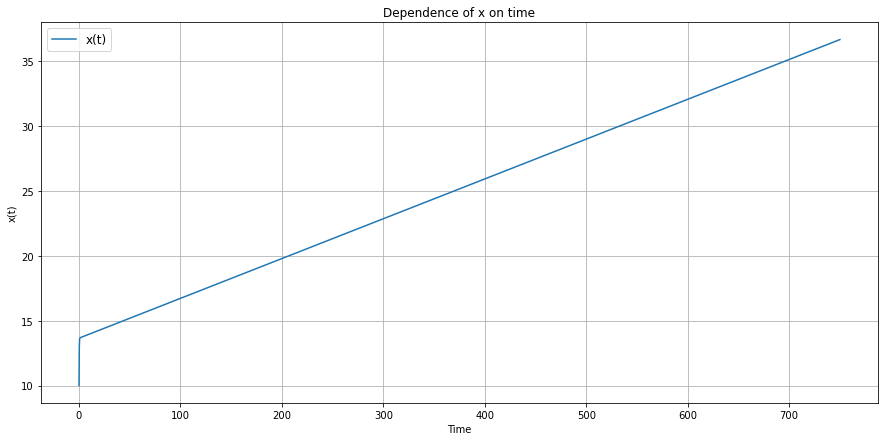

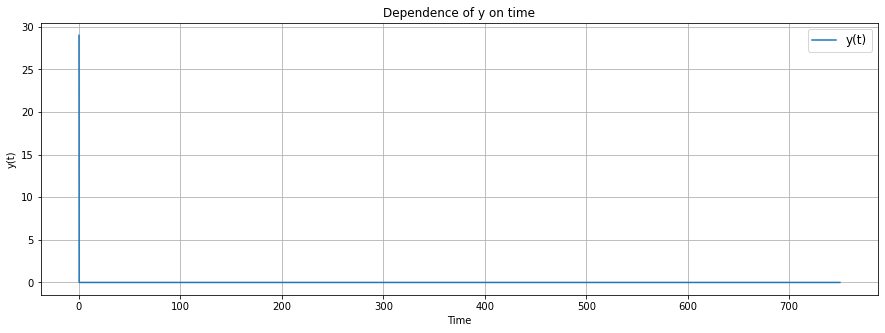

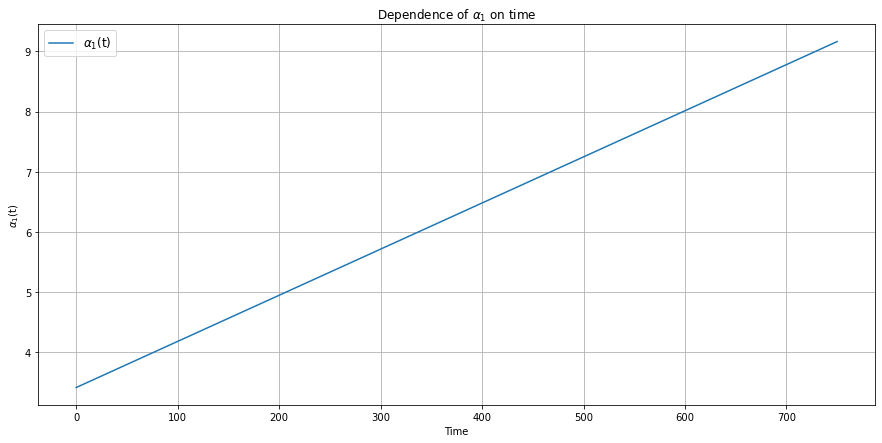

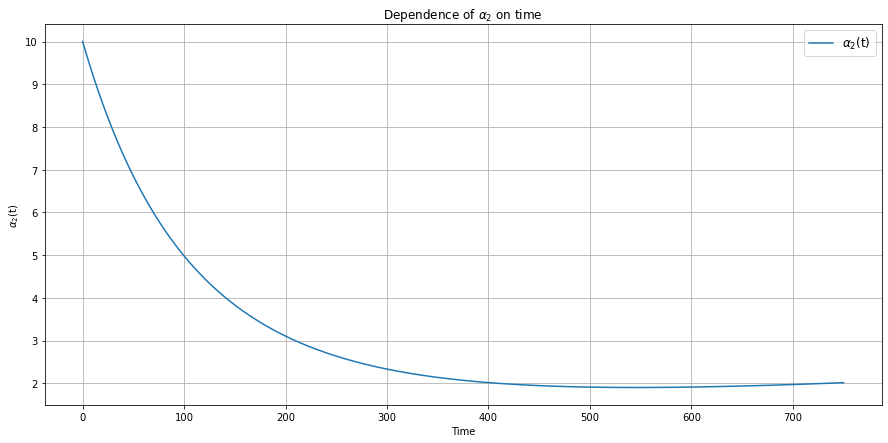

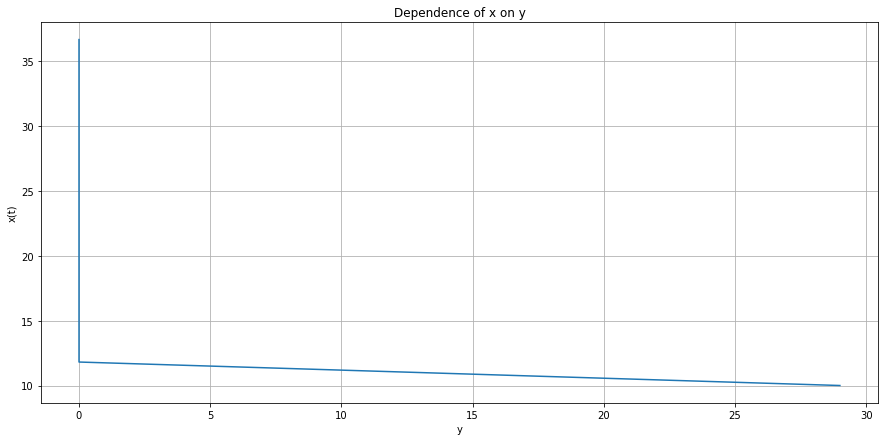

In [7]:
Test_2_1 = Ecogenetic_model_2_Var1(eps=random.uniform(1e-3, 1e-2), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=750, tau=1e-4)
Test_2_1.Explicit_Runge_Kutta_method_4_order()
Test_2_1.Plotting(points_cnt = 5000)

  0%|          | 7771/7500000 [00:00<01:36, 77706.18it/s]

eps =  0.01
alpha_10 =  4.05
alpha_20 =  1.0
x_0 =  3
y_0 =  7.5


100%|██████████| 7500000/7500000 [01:38<00:00, 75937.24it/s]


x[0:5] =  [3, 2.9652835618007063, 2.930982011372263, 2.8970901720848787, 2.8636029359692334]
y[0:5] =  [7.5, 7.498551531661088, 7.4971054609969014, 7.495661767098402, 7.494220429314812]
alpha1[0:5] =  [4.05, 4.049941256407808, 4.049882525618187, 4.049823807611693, 4.049765102369045]
alpha2[0:5] =  [1.0, 1.0000016363173172, 1.000003276831402, 1.0000049214922366, 1.000006570250426]


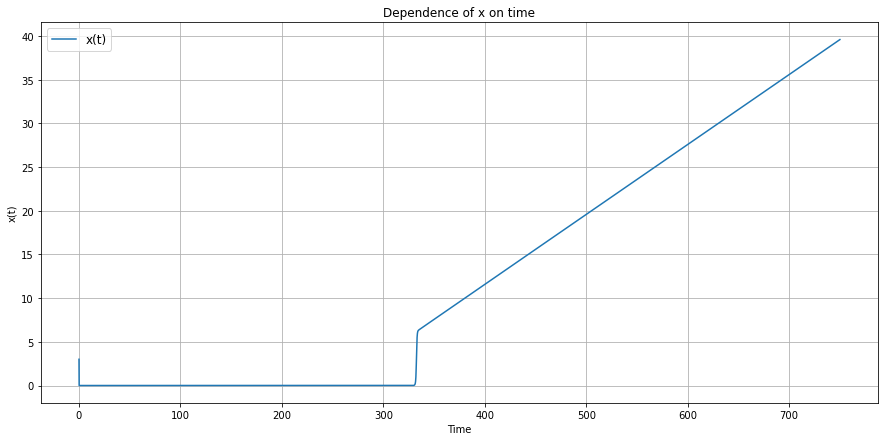

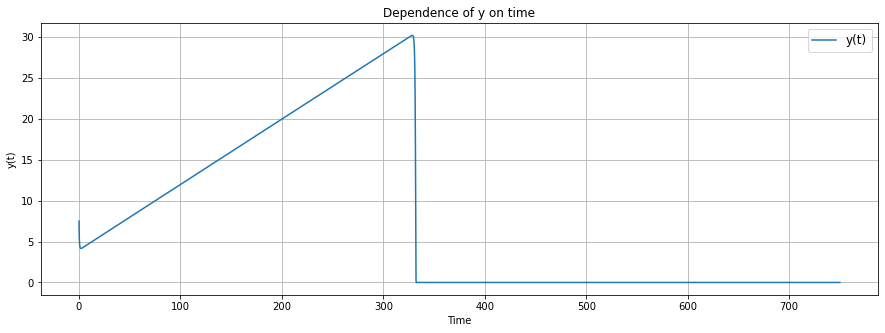

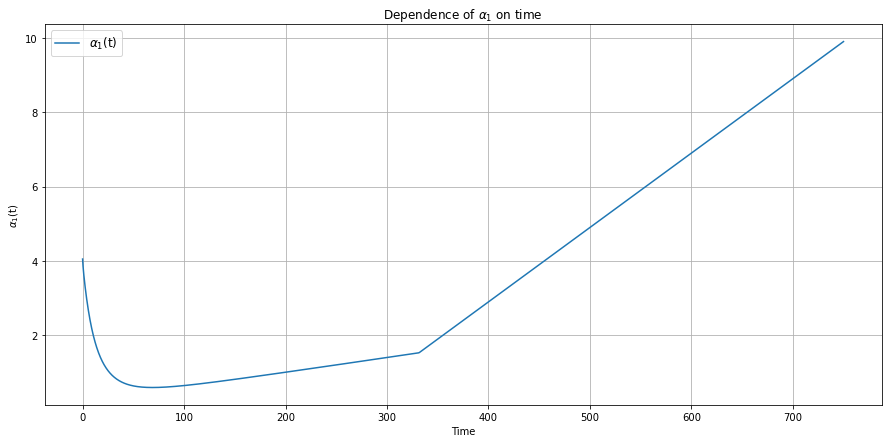

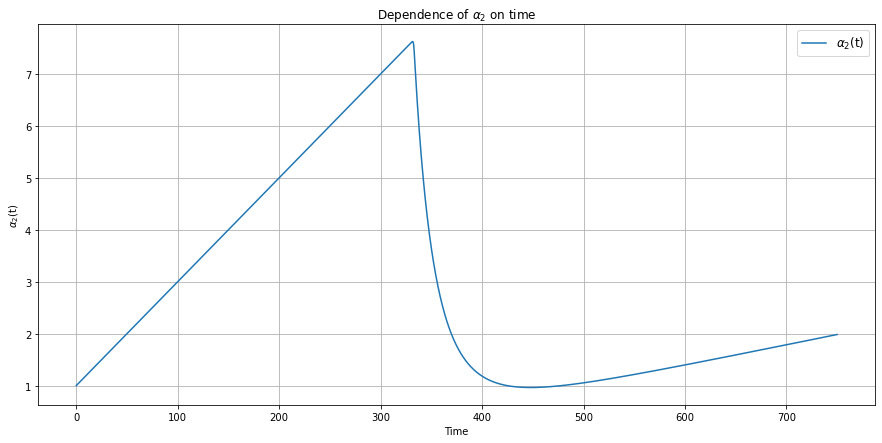

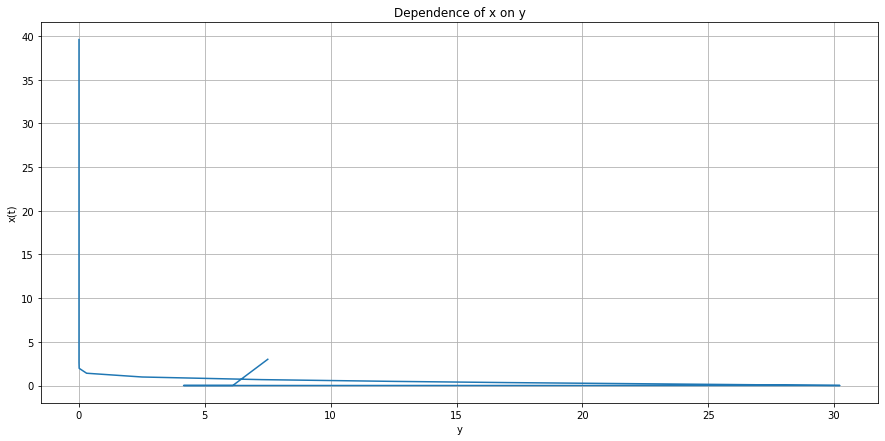

In [8]:
Test_2_2 = Ecogenetic_model_2_Var1(eps=0.01, x0=3, 
                                   y0=7.5, alpha10 = 4.05, 
                                   alpha20 = 1.0, Tk=750, tau=1e-4)
Test_2_2.Explicit_Runge_Kutta_method_4_order()
Test_2_2.Plotting(points_cnt = 5000)

In [9]:
Test_2_3 = Ecogenetic_model_2_Var1(eps=random.uniform(1e-3, 1e-2), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=2000, tau=0.1)
Test_2_3.Explicit_Runge_Kutta_method_4_order()
Test_2_3.Plotting(points_cnt = 5000)

  0%|          | 2/20000 [00:00<00:11, 1752.74it/s]

eps =  0.008282126081495575
alpha_10 =  0.8283549750510303
alpha_20 =  10
x_0 =  27
y_0 =  30


OverflowError: (34, 'Result too large')

In [10]:
Test_2_4 = Ecogenetic_model_2_Var1(eps=random.uniform(1e-3, 1e-2), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=2000, tau=1)
Test_2_4.Explicit_Runge_Kutta_method_4_order()
Test_2_4.Plotting(points_cnt = 5000)

  0%|          | 2/2000 [00:00<00:00, 5011.12it/s]

eps =  0.00597200713322708
alpha_10 =  1.925061489787597
alpha_20 =  10
x_0 =  15
y_0 =  16


OverflowError: (34, 'Result too large')

# Экогенетическая модель 2(2)

- Рассмотрим немного другую систему дифференциальных уравнений, а именно:

\begin{equation*}
    \begin{cases}
        \dot{x} = x(2\alpha_1 - 0.5x - \frac{\alpha_1^3}{\alpha_2^3}y)\\
        \dot{y} = y(2\alpha_2 - \frac{\alpha_2^3}{\alpha_1^3}x - 0.5y)\\
        \dot{\alpha_1} = \varepsilon(2 - 3\frac{\alpha_1^2}{\alpha_2^3}y)\\
        \dot{\alpha_2} = \varepsilon(2 - 3\frac{\alpha_2^2}{\alpha_1^3}x)
    \end{cases}
\end{equation*}

- Обозначим

\begin{equation*}
    \vec{f}(t, \vec{u}) = 
    \begin{bmatrix}
        x(2\alpha_1 - 0.5x - \frac{\alpha_1^3}{\alpha_2^3}y)\\
        y(2\alpha_2 - \frac{\alpha_2^3}{\alpha_1^3}x - 0.5y)\\
        \varepsilon(2 - 3\frac{\alpha_1^2}{\alpha_2^3}y)\\
        \varepsilon(2 - 3\frac{\alpha_2^2}{\alpha_1^3}x)
    \end{bmatrix}
\end{equation*}



- Параметры задачи таковы: 
$$
\varepsilon \leqslant 0.001,~~~ 0 \leqslant x_0 \leqslant 40,~~~ 0 \leqslant y_0 \leqslant 40,~~~ \alpha_{10} = 0,~~~ \alpha_{20} = 10~~~ T_k = 2000  
$$

- Будем численно решать данную задачу с помощью **явного метода Рунге-Кутты 4-го порядка точности.**
- Следовательно, получаем следующую итерационную схему с матрицей Бутчера:

| 0   |     |     |     |     |
|-----|-----|-----|-----|-----|
| 1/2 | 1/2 |     |     |     |
| 1/2 | 0   | 1/2 |     |     |
| 1   | 0   | 0   | 1   |     |
|     | 1/6 | 2/6 | 2/6 | 1/6 |

\begin{equation*}
    \vec{k_1^{(n)}} =
    \begin{bmatrix}
        k_{1x}^{(n)} \\ 
        k_{1y}^{(n)} \\ 
        k_{1\alpha_1}^{(n)} \\ 
        k_{1\alpha_2}^{(n)} \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        x_n(2\alpha_{1n} - 0.5x_n - \frac{\alpha_{1n}^3}{\alpha_{2n}^3}y_n) \\ 
        y_n(2\alpha_{2n} - \frac{\alpha_{2n}^3}{\alpha_{1n}^3}x_n - 0.5y_n) \\ 
        \varepsilon(2 - 3\frac{\alpha_{1n}^2}{\alpha_{2n}^3}y_n) \\
        \varepsilon(2 - 3\frac{\alpha_{2n}^2}{\alpha_{1n}^3}x_n)
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \vec{k_2^{(n)}} =
    \begin{bmatrix}
        k_{2x}^{(n)} \\ 
        k_{2y}^{(n)} \\ 
        k_{2\alpha_1}^{(n)} \\ 
        k_{2\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \frac{\tau}{2}, \vec{u_n} + \frac{\tau}{2}\vec{k_1^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{k_3^{(n)}} =
    \begin{bmatrix}
        k_{3x}^{(n)} \\ 
        k_{3y}^{(n)} \\ 
        k_{3\alpha_1}^{(n)} \\ 
        k_{3\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \frac{\tau}{2}, \vec{u_n} + \frac{\tau}{2}\vec{k_2^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{k_4^{(n)}} =
    \begin{bmatrix}
        k_{4x}^{(n)} \\ 
        k_{4y}^{(n)} \\ 
        k_{4\alpha_1}^{(n)} \\ 
        k_{4\alpha_2}^{(n)} \\
    \end{bmatrix}
    = \vec{f}(t_n + \tau, \vec{u_n} + \tau\vec{k_3^{(n)}})
\end{equation*}

\begin{equation*}
    \vec{u_{n + 1}} =
    \begin{bmatrix}
        x_{n + 1} \\ 
        y_{n + 1} \\ 
        \alpha_{1(n + 1)} \\
        \alpha_{2(n + 1)} \\
    \end{bmatrix}
    = \vec{u_n} + \frac{\tau}{6} (\vec{k_1^{(n)}} + 2\vec{k_2^{(n)}} + 2\vec{k_3^{(n)}} + \vec{k_4^{(n)}})
\end{equation*}

In [11]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

class Ecogenetic_model_2_Var2:
    def __init__(self, eps=random.uniform(1e-4, 1e-3), x0=random.randint(0, 40), y0=random.randint(0, 40), 
                 alpha10 = random.uniform(0.1, 5.0), alpha20 = 10, Tk=1500, tau=1e-5):
        self.x = [x0]
        self.y = [y0]
        self.eps = eps
        self.alpha1 = [alpha10]
        self.alpha2 = [alpha20]
        self.Tk = Tk
        self.tau = tau
        self.Time = []
        
        print('eps = ', eps)
        print('alpha_10 = ', alpha10)
        print('alpha_20 = ', alpha20)
        print('x_0 = ', x0)
        print('y_0 = ', y0)
        
    def Explicit_Runge_Kutta_method_4_order(self):
        NumOfIter = int(self.Tk / self.tau)
        
        for i in tqdm(range(NumOfIter)):
            k1_x = self.x[i] * (2 * self.alpha1[i] - 0.5 * self.x[i] -\
                                ((self.alpha1[i] / self.alpha2[i]) ** 3) * self.y[i])
            k1_y = self.y[i] * (2 * self.alpha2[i] - 0.5 * self.y[i] -\
                                ((self.alpha2[i] / self.alpha1[i]) ** 3) * self.x[i])
            k1_alpha1 = self.eps * (2 - ((3 * (self.alpha1[i] ** 2)) / (self.alpha2[i] ** 3)) * self.y[i])
            k1_alpha2 = self.eps * (2 - ((3 * (self.alpha2[i] ** 2)) / (self.alpha1[i] ** 3)) * self.x[i])
            
            k2_x = (self.x[i] + (self.tau / 2) * k1_x) * (2 * (self.alpha1[i] + (self.tau / 2) * k1_alpha1) -\
                    0.5 * (self.x[i] + (self.tau / 2) * k1_x) -\
                    (((self.alpha1[i] + (self.tau / 2) * k1_alpha1) /\
                    (self.alpha2[i] + (self.tau / 2) * k1_alpha2)) ** 3) *\
                    (self.y[i] + (self.tau / 2) * k1_y))
            k2_y = (self.y[i] + (self.tau / 2) * k1_y) * (2 * (self.alpha2[i] + (self.tau / 2) *\
                    k1_alpha2) - 0.5 * (self.y[i] + (self.tau / 2) * k1_y) -\
                    (((self.alpha2[i] + (self.tau / 2) * k1_alpha2) /\
                    (self.alpha1[i] + (self.tau / 2) * k1_alpha1)) ** 3) * (self.x[i] + (self.tau / 2) * k1_x))
            k2_alpha1 = self.eps * (2 - (3 * (((self.alpha1[i] + (self.tau / 2) * k1_alpha1))) ** 2 /\
                        ((self.alpha2[i] + (self.tau / 2) * k1_alpha2) ** 3)) *\
                        (self.y[i] + (self.tau / 2) * k1_y))
            k2_alpha2 = self.eps * (2 - ((3 * ((self.alpha2[i] + (self.tau / 2) * k1_alpha2) ** 2)) /\
                        ((self.alpha1[i] + (self.tau / 2) * k1_alpha1) ** 3)) * (self.x[i] +\
                                                                                 (self.tau / 2) * k1_x))
            
            k3_x = (self.x[i] + (self.tau / 2) * k2_x) * (2 * (self.alpha1[i] + (self.tau / 2) * k2_alpha1) -\
                    0.5 * (self.x[i] + (self.tau / 2) * k2_x) -\
                    (((self.alpha1[i] + (self.tau / 2) * k2_alpha1) /\
                    (self.alpha2[i] + (self.tau / 2) * k2_alpha2)) ** 3) *\
                    (self.y[i] + (self.tau / 2) * k2_y))
            k3_y = (self.y[i] + (self.tau / 2) * k2_y) * (2 * (self.alpha2[i] + (self.tau / 2) *\
                    k2_alpha2) - 0.5 * (self.y[i] + (self.tau / 2) * k2_y) -\
                    (((self.alpha2[i] + (self.tau / 2) * k2_alpha2) /\
                    (self.alpha1[i] + (self.tau / 2) * k2_alpha1)) ** 3) * (self.x[i] + (self.tau / 2) * k2_x))
            k3_alpha1 = self.eps * (2 - ((2 * ((self.alpha1[i] + (self.tau / 2) * k2_alpha1) ** 2)) /\
                        ((self.alpha2[i] + (self.tau / 2) * k2_alpha2) ** 3)) *\
                        (self.y[i] + (self.tau / 2) * k2_y))
            k3_alpha2 = self.eps * (2 - ((2 * ((self.alpha2[i] + (self.tau / 2) * k2_alpha2) ** 2)) /\
                        ((self.alpha1[i] + (self.tau / 2) * k2_alpha1) ** 3)) * (self.x[i] +\
                                                                                 (self.tau / 2) * k2_x))
            
            k4_x = (self.x[i] + self.tau * k3_x) * (2 * (self.alpha1[i] + self.tau * k3_alpha1) -\
                    0.5 * (self.x[i] + self.tau * k3_x) - (((self.alpha1[i] + self.tau * k3_alpha1) /\
                    (self.alpha2[i] + self.tau * k3_alpha2)) ** 3) * (self.y[i] + self.tau * k3_y))
            k4_y = (self.y[i] + self.tau * k3_y) * (2 * (self.alpha2[i] + self.tau * k3_alpha2) -\
                    0.5 * (self.y[i] + self.tau * k3_y) -(((self.alpha2[i] + self.tau * k3_alpha2) /\
                    (self.alpha1[i] + self.tau * k3_alpha1)) ** 3) * (self.x[i] + self.tau * k3_x))
            k4_alpha1 = self.eps * (2 - ((2 * ((self.alpha1[i] + self.tau * k3_alpha1) ** 2)) /\
                        ((self.alpha2[i] + self.tau * k3_alpha2) ** 3)) * (self.y[i] + self.tau * k3_y))
            k4_alpha2 = self.eps * (2 - ((2 * ((self.alpha2[i] + self.tau * k3_alpha2) ** 2)) /\
                        ((self.alpha1[i] + self.tau * k3_alpha1) ** 3)) * (self.x[i] + self.tau * k3_x))
            
            self.x.append(self.x[i] + (self.tau / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x))
            self.y.append(self.y[i] + (self.tau / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y))
            self.alpha1.append(self.alpha1[i] + (self.tau / 6) * (k1_alpha1 + 2 * k2_alpha1 +\
                                                                  2 * k3_alpha1 + k4_alpha1))
            self.alpha2.append(self.alpha2[i] + (self.tau / 6) * (k1_alpha2 + 2 * k2_alpha2 +\
                                                                  2 * k3_alpha2 + k4_alpha2))
            self.Time.append(self.tau * i)
            
        self.Time.append(self.Tk)
        
        print("x[0:5] = ", self.x[:5])
        print("y[0:5] = ", self.y[:5])
        print("alpha1[0:5] = ", self.alpha1[:5])
        print("alpha2[0:5] = ", self.alpha2[:5])
        
    def Plotting(self, points_cnt = 20000):
        
        indices = np.arange(0, len(self.Time), int(len(self.Time) / (points_cnt + 1)))
        TimeSample = np.take(self.Time, indices)
        xSample = np.take(self.x, indices)
        ySample = np.take(self.y, indices)
        alpha1Sample = np.take(self.alpha1, indices)
        alpha2Sample = np.take(self.alpha2, indices)
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, xSample, label='x(t)')
        plt.title(r'Dependence of x on time')
        plt.xlabel('Time')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 5))
        plt.plot(TimeSample, ySample, label='y(t)')
        plt.title(r'Dependence of y on time')
        plt.xlabel('Time')
        plt.ylabel('y(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, alpha1Sample, label=r'$\alpha_1$(t)')
        plt.title(r'Dependence of $\alpha_1$ on time')
        plt.xlabel('Time')
        plt.ylabel(r'$\alpha_1$(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(TimeSample, alpha2Sample, label=r'$\alpha_2$(t)')
        plt.title(r'Dependence of $\alpha_2$ on time')
        plt.xlabel('Time')
        plt.ylabel(r'$\alpha_2$(t)')
        plt.grid(True)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        
        plt.figure(figsize=(15, 7))
        plt.plot(ySample, xSample)
        plt.title('Dependence of x on y')
        plt.xlabel('y')
        plt.ylabel('x(t)')
        plt.grid(True)
        plt.show()

## Тесты 

  0%|          | 6911/6000000 [00:00<01:26, 69107.92it/s]

eps =  0.0001376405101001538
alpha_10 =  2.5618754632698564
alpha_20 =  10
x_0 =  27
y_0 =  17


100%|██████████| 6000000/6000000 [01:43<00:00, 57869.18it/s]


x[0:5] =  [27, 26.976696521214986, 26.953549249906896, 26.930542085117327, 26.907661330403354]
y[0:5] =  [17, 14.496666834188588, 12.365102064945104, 10.549447917108328, 9.002384597821724]
alpha1[0:5] =  [2.5618754632698564, 2.5618754872316924, 2.5618755117183127, 2.561875536651857, 2.5618755619661466]
alpha2[0:5] =  [10, 9.999994504203977, 9.999989013167955, 9.999983526861543, 9.99997804525741]


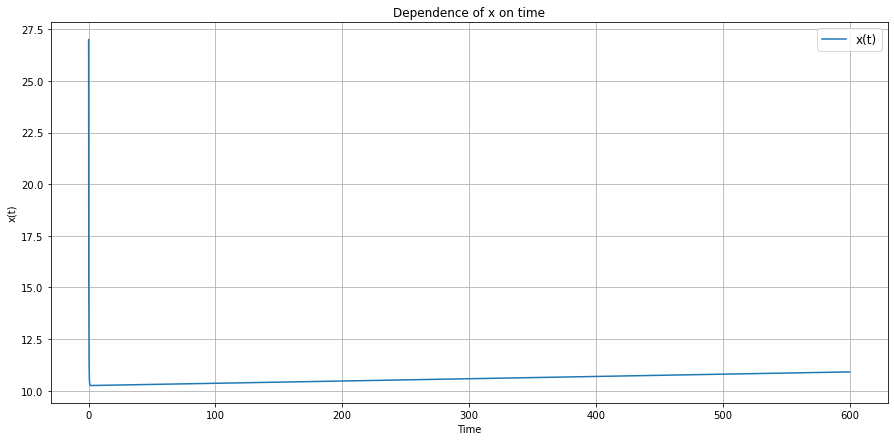

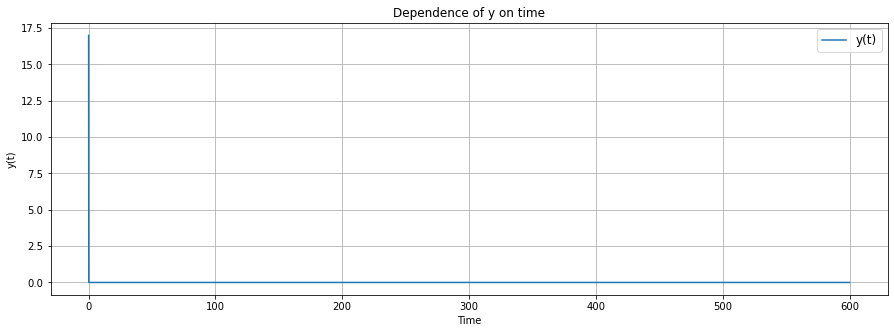

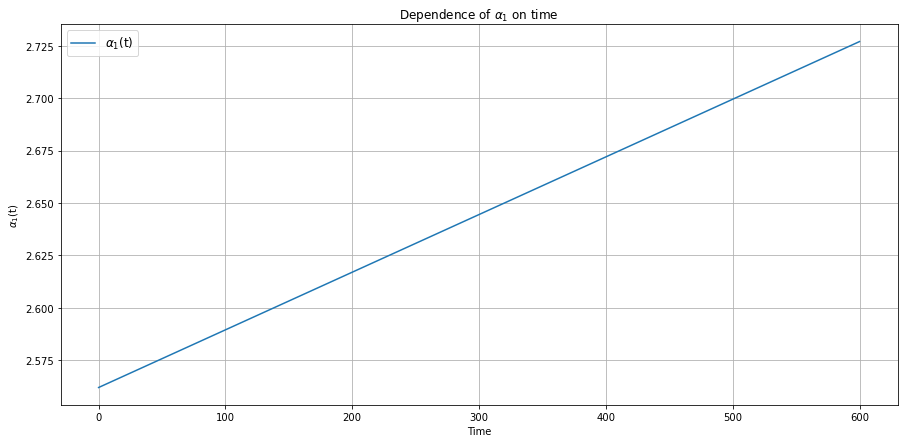

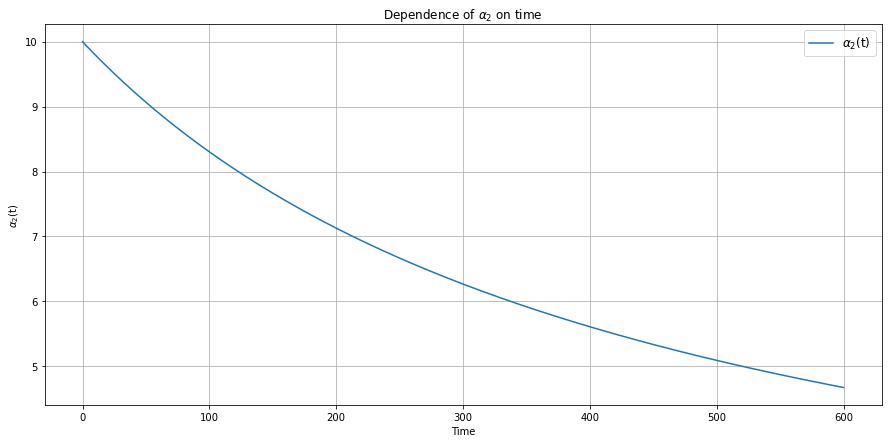

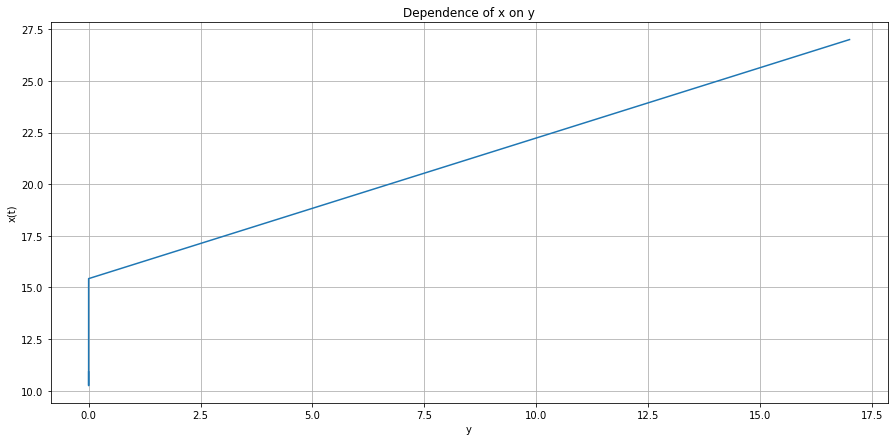

In [12]:
Test_3_1 = Ecogenetic_model_2_Var2(eps=random.uniform(1e-4, 1e-3), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=600, tau=1e-4)
Test_3_1.Explicit_Runge_Kutta_method_4_order()
Test_3_1.Plotting(points_cnt = 5000)

  0%|          | 7131/7500000 [00:00<01:45, 71306.33it/s]

eps =  0.01
alpha_10 =  4.05
alpha_20 =  1.0
x_0 =  3
y_0 =  7.5


100%|██████████| 7500000/7500000 [01:49<00:00, 68494.94it/s]


x[0:5] =  [3, 2.856119588672978, 2.719214301277476, 2.5889415170395047, 2.464975744590786]
y[0:5] =  [7.5, 7.498654819053933, 7.497311963079136, 7.495971353995862, 7.494632917527305]
alpha1[0:5] =  [4.05, 4.0496945032038685, 4.049389109638, 4.049083819176392, 4.048778631696014]
alpha2[0:5] =  [1.0, 1.0000018896405043, 1.0000037845483485, 1.0000056844694043, 1.0000075891619669]


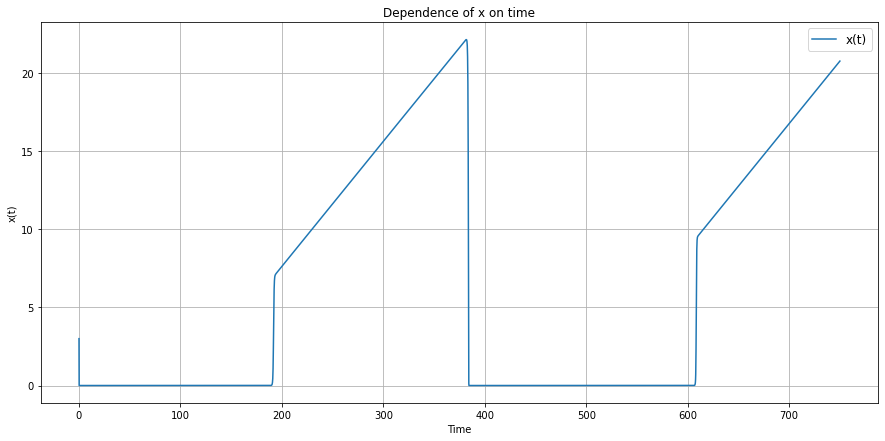

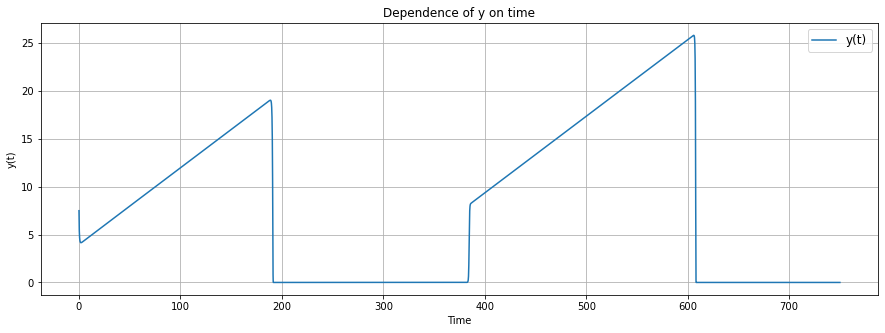

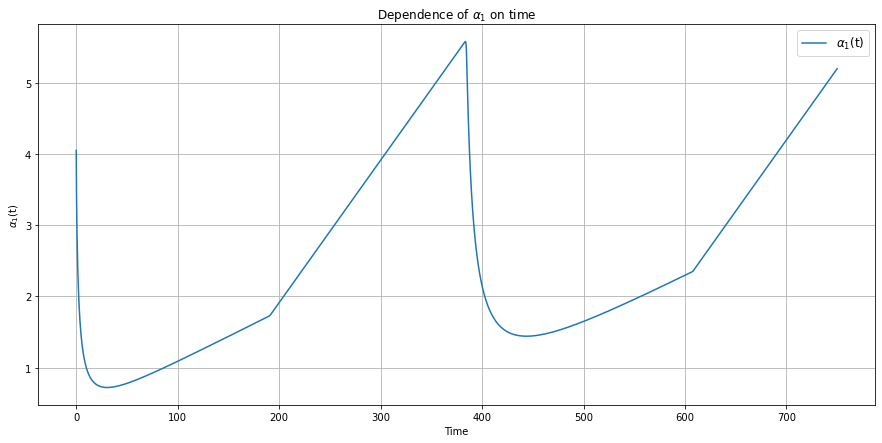

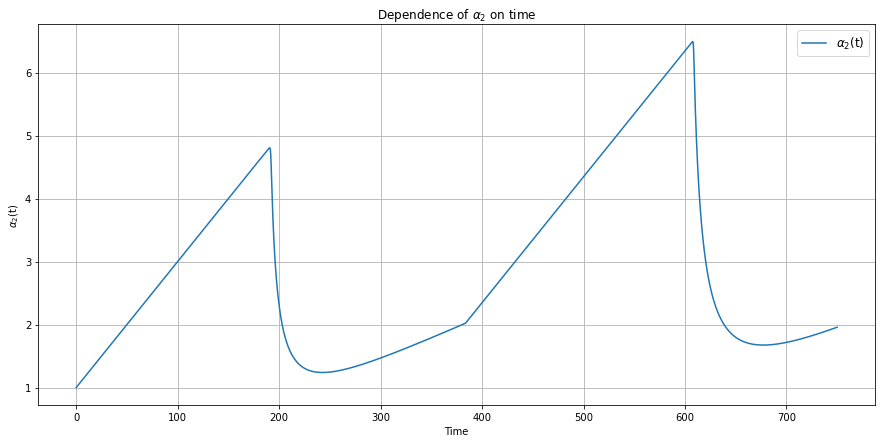

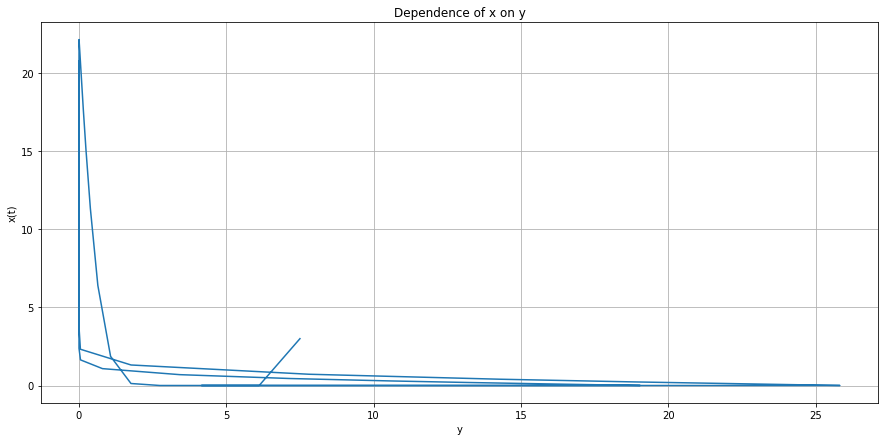

In [14]:
Test_3_2 = Ecogenetic_model_2_Var2(eps=1e-2, x0=3, 
                                   y0=7.5, alpha10 = 4.05, 
                                   alpha20 = 1.0, Tk=750, tau=1e-4)
Test_3_2.Explicit_Runge_Kutta_method_4_order()
Test_3_2.Plotting(points_cnt = 5000)

In [15]:
Test_3_3 = Ecogenetic_model_2_Var2(eps=random.uniform(1e-4, 1e-3), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=2000, tau=0.1)
Test_3_3.Explicit_Runge_Kutta_method_4_order()
Test_3_3.Plotting(points_cnt = 5000)

  0%|          | 2/20000 [00:00<00:02, 9436.00it/s]

eps =  0.0003612093948150864
alpha_10 =  3.0202525792631443
alpha_20 =  10
x_0 =  22
y_0 =  3


OverflowError: (34, 'Result too large')

In [16]:
Test_3_4 = Ecogenetic_model_2_Var2(eps=random.uniform(1e-4, 1e-3), x0=random.randint(0, 40), 
                                   y0=random.randint(0, 40), alpha10 = random.uniform(0.1, 5.0), 
                                   alpha20 = 10, Tk=2000, tau=1)
Test_3_4.Explicit_Runge_Kutta_method_4_order()
Test_3_4.Plotting(points_cnt = 5000)

  0%|          | 1/2000 [00:00<00:02, 693.04it/s]

eps =  0.0007918278885014103
alpha_10 =  0.14270878726591218
alpha_20 =  10
x_0 =  10
y_0 =  24


OverflowError: (34, 'Result too large')

# Выводы:

- Как мы видим из численного решения, решением задачи являются релаксационные колебания.
- Меняя шаг, мы также можем проследить область устойчивости данного метода. 